<a href="https://colab.research.google.com/github/haleemiliyash/Customer_Conversion_prediction_-Model/blob/main/Copy_of_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem statement

In the insurance industry, acquiring new customers and converting leads into sales is
crucial for business growth. The dataset provided contains information about a series
of marketing calls made to potential customers by an insurance company. The goal is
to predict whether a customer will subscribe to an insurance policy based on various
attributes of the customer and details of the marketing interactions.

##Features
*  age: Age of the customer.
*  job: Type of job the customer holds.
*  marital: Marital status of the customer.
*  education_qual: Educational qualification of the customer.
*  call_type: Type of marketing call.
*  day: Day of the month when the call was made.
*  mon: Month when the call was made.
*  dur: Duration of the call in seconds.
*  num_calls: Number of calls made to the customer before this interaction.
*  prev_outcome: Outcome of the previous marketing campaign.
*  Outcome: Whether the customer subscribed to the insurance policy (target variable)














In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Data preprocessing

In [2]:
sample=pd.read_csv('/content/insurance_dataset.csv')
sample.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [3]:
sample.shape

(45211, 11)

In [4]:
sample.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'Outcome'],
      dtype='object')

In [5]:
sample.dtypes

,0
age,int64
job,object
marital,object
education_qual,object
call_type,object
day,int64
mon,object
dur,int64
num_calls,int64
prev_outcome,object


In [6]:
#check null values
sample.isnull().sum()

,0
age,0
job,0
marital,0
education_qual,0
call_type,0
day,0
mon,0
dur,0
num_calls,0
prev_outcome,0


In [7]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  Outcome         45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [8]:
dupilcate=sample[sample.duplicated()]
dupilcate

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome
6893,34,services,married,secondary,unknown,28,may,124,1,unknown,no
8138,29,admin.,single,secondary,unknown,2,jun,121,4,unknown,no
11630,39,blue-collar,married,primary,unknown,19,jun,112,4,unknown,no
13400,36,blue-collar,married,secondary,cellular,9,jul,183,1,unknown,no
19826,36,management,married,tertiary,cellular,8,aug,75,2,unknown,no
19854,32,technician,single,tertiary,cellular,8,aug,31,2,unknown,no


6 duplicate data are observed so we will drop the data

In [9]:
sample.drop_duplicates(inplace=True)

In [10]:
sample.duplicated().sum()

0

In [11]:
sample['age'].describe()

,age
count,45205.000000
mean,40.937087
std,10.619130
min,18.000000
25%,33.000000
50%,39.000000
75%,48.000000
max,95.000000


<Axes: xlabel='Outcome'>

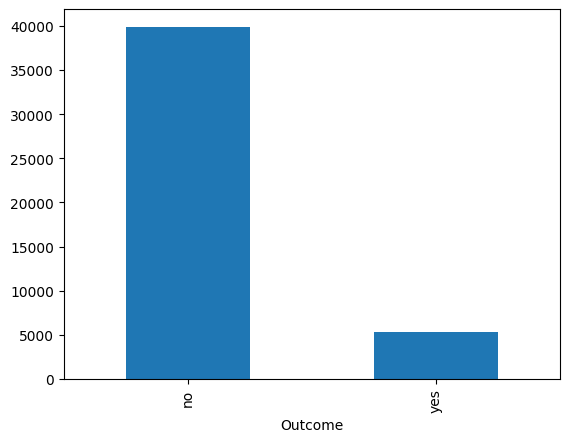

In [12]:
sample['Outcome'].value_counts()
sample['Outcome'].value_counts().plot(kind='bar')

In [13]:
sample['Outcome'].value_counts()/sample['Outcome'].count()*100

,count
Outcome,
no,88.299967
yes,11.700033


Our target values are imbalaced

#Encode the categorical value to numerical value

In [14]:
sample['Outcome'].unique()

array(['no', 'yes'], dtype=object)

In [15]:
sample['Outcome']=sample['Outcome'].map({'no':0,'yes':1})

In [16]:
sample.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,1
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,0
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,0


#Job

In [17]:
sample['job'].value_counts()

,count
job,
blue-collar,9730
management,9457
technician,7596
admin.,5170
services,4153
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303


288 value are unknown in Job feature  In 45211 data 288 data wont impact the final result

In [18]:
sample['job'].value_counts()/sample['job'].count()*100

,count
job,
blue-collar,21.524168
management,20.920252
technician,16.803451
admin.,11.436788
services,9.187037
retired,5.008296
self-employed,3.492976
entrepreneur,3.289459
unemployed,2.882425


In [19]:
#how many % get insured
sample.groupby('job')['Outcome'].mean()

,Outcome
job,
admin.,0.122050
blue-collar,0.072765
entrepreneur,0.082717
housemaid,0.087903
management,0.137570
retired,0.227915
self-employed,0.118429
services,0.088851
student,0.286780


In [20]:
sample['job']=sample['job'].replace('unknown',np.nan)

In [21]:
sample.job.isnull().sum()

288

In [22]:
sample=sample.dropna(subset=['job'])

In [23]:
sample['job'].value_counts()

,count
job,
blue-collar,9730
management,9457
technician,7596
admin.,5170
services,4153
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303


#Marital Status

In [24]:
sample['marital'].value_counts()

,count
marital,
married,27007
single,12720
divorced,5190


#Education qualification

In [25]:
sample['education_qual'].value_counts()

,count
education_qual,
secondary,23128
tertiary,13260
primary,6799
unknown,1730


In [26]:
sample['education_qual'].value_counts()/sample['education_qual'].count()*100

,count
education_qual,
secondary,51.490527
tertiary,29.521117
primary,15.136808
unknown,3.851548


Unknown value education_qual 3.8% it will not affect the dataset

In [27]:
sample['education_qual']=sample['education_qual'].replace('unknown',np.nan)

In [28]:
sample.education_qual.isnull().sum()

1730

In [29]:
sample=sample.dropna(subset=['education_qual'])

In [30]:
sample['education_qual'].value_counts()

,count
education_qual,
secondary,23128
tertiary,13260
primary,6799


#Call type

In [31]:
sample['call_type'].value_counts()

,count
call_type,
cellular,28210
unknown,12283
telephone,2694


In [32]:
sample['call_type'].value_counts()/sample['call_type'].count()*100

,count
call_type,
cellular,65.320583
unknown,28.441429
telephone,6.237988


Around unknown values in Call type is 28.44% if we will drop mean it impact the data set.

#Day

In [33]:
sample['day'].value_counts()

,count
day,
20,2628
18,2227
21,1961
17,1872
6,1817
5,1796
14,1784
8,1758
7,1739


In [34]:
sample['day'].value_counts()/sample['day'].count()*100

,count
day,
20,6.085165
18,5.156644
21,4.540718
17,4.334638
6,4.207285
5,4.158659
14,4.130873
8,4.070669
7,4.026675


#Months

In [35]:
sample['mon'].value_counts()

,count
mon,
may,13191
jul,6600
aug,6035
jun,4978
nov,3842
apr,2820
feb,2533
jan,1318
oct,690


In [36]:
sample['mon'].value_counts()/sample['mon'].count()*100

,count
mon,
may,30.543914
jul,15.282377
aug,13.974113
jun,11.526617
nov,8.896196
apr,6.529743
feb,5.865191
jan,3.051844
oct,1.597703


#Duration

In [37]:
sample['dur'].value_counts()

,count
dur,
124,176
90,172
89,172
114,172
122,169
...,...
1327,1
1331,1
1608,1


In [38]:
sample['dur'].describe()

,dur
count,43187.000000
mean,258.344340
std,258.173244
min,0.000000
25%,103.000000
50%,180.000000
75%,318.000000
max,4918.000000


In [39]:
sample['num_calls'].value_counts()

,count
num_calls,
1,16740
2,11936
3,5277
4,3397
5,1703
6,1234
7,696
8,516
9,307


In [40]:
sample['prev_outcome'].value_counts()

,count
prev_outcome,
unknown,35280
failure,4709
other,1774
success,1424


In [41]:
sample['prev_outcome'].value_counts()/sample['prev_outcome'].count()*100

,count
prev_outcome,
unknown,81.691250
failure,10.903744
other,4.107718
success,3.297289


Around 82% in data set is unknown in Prev_outcome  so leave as it is.

#outliner detection and correction

In [42]:
def outlier(sample,column):
  q1= sample[column].quantile(0.25)
  q3= sample[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  return upper_threshold,lower_threshold

In [43]:
column=['age','day','dur','num_calls']
for i in column:
     print(i,outlier(sample,i))

age (70.5, 10.5)
day (40.5, -11.5)
dur (640.5, -219.5)
num_calls (6.0, -2.0)


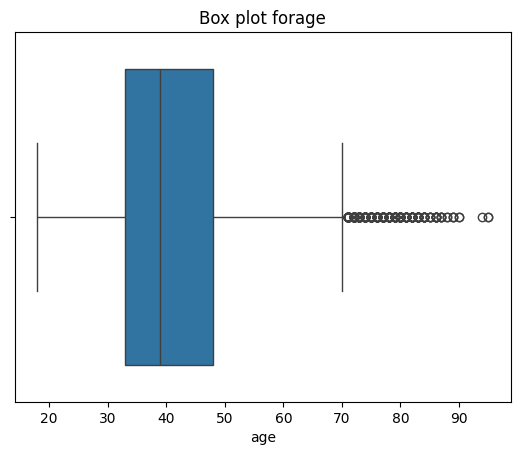

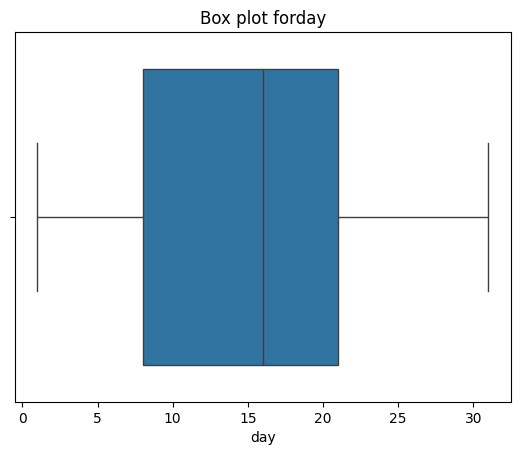

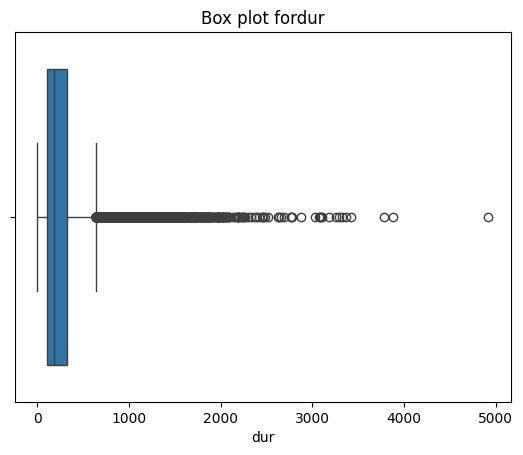

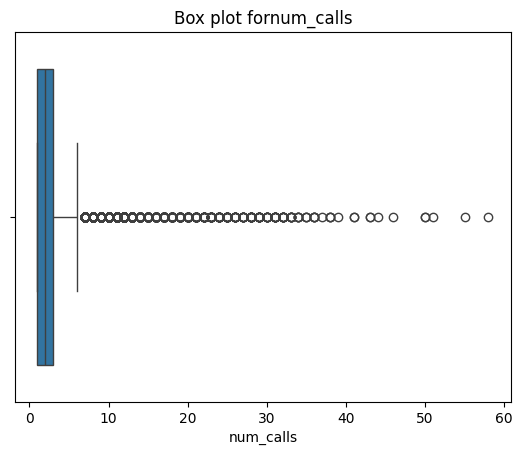

In [44]:
for i in column:
    sns.boxplot(x=sample[i])
    plt.title("Box plot for" +  i)
    plt.show()

#In Age, duration,Number call have some outliner shown in plot

# Trimming(age)

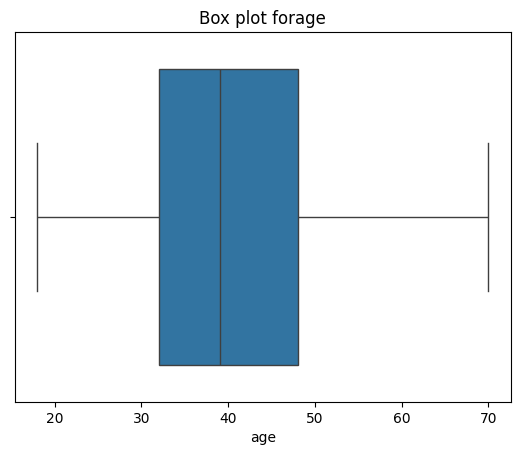

In [45]:
Q1A = sample['age'].quantile(0.25)
Q3A = sample['age'].quantile(0.75)
IQR = Q3A - Q1A

# Define the lower and upper bounds
lower_boundA = Q1A - 1.5 * IQR
upper_boundA = Q3A + 1.5 * IQR

sample=sample[(sample['age'] >= lower_boundA) & (sample['age'] <= upper_boundA)]

sns.boxplot(x=sample['age'])
plt.title("Box plot for" +  "age")
plt.show()



#duration

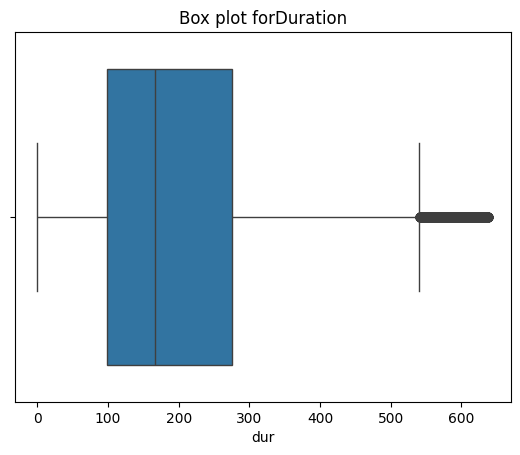

In [46]:
Q1d = sample['dur'].quantile(0.25)
Q3d = sample['dur'].quantile(0.75)
IQRd = Q3d - Q1d

# Define the lower and upper bounds
lower_boundD = Q1d - 1.5 * IQRd
upper_boundD = Q3d + 1.5 * IQRd

sample=sample[(sample['dur'] >= lower_boundD) & (sample['dur'] <= upper_boundD)]

sns.boxplot(x=sample['dur'])
plt.title("Box plot for" +  "Duration")
plt.show()

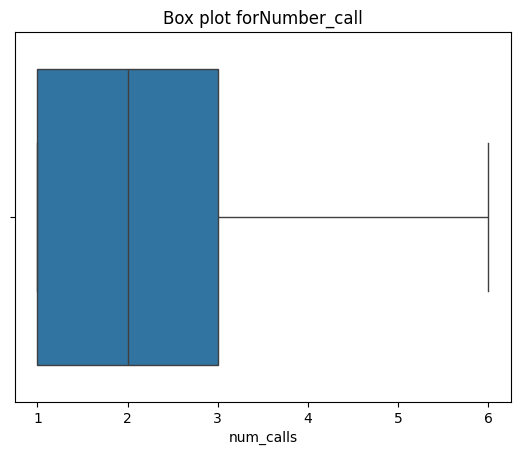

In [47]:
Q1N = sample['num_calls'].quantile(0.25)
Q3N = sample['num_calls'].quantile(0.75)
IQRN = Q3N - Q1N

# Define the lower and upper bounds
lower_boundN = Q1N - 1.5 * IQRN
upper_boundN = Q3N + 1.5 * IQRN

sample=sample[(sample['num_calls'] >= lower_boundN) & (sample['num_calls'] <= upper_boundN)]

sns.boxplot(x=sample['num_calls'])
plt.title("Box plot for" +  "Number_call")
plt.show()

#Exploratory Data analysis

# Age distribution

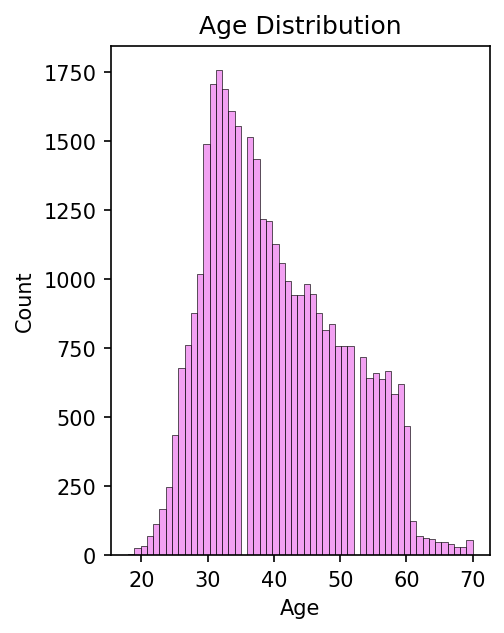

In [48]:
plt.figure(figsize = (15,15),dpi=150)
plt.subplot(3,4,1)
sns.histplot((sample.age),color='Violet')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#Job distribution

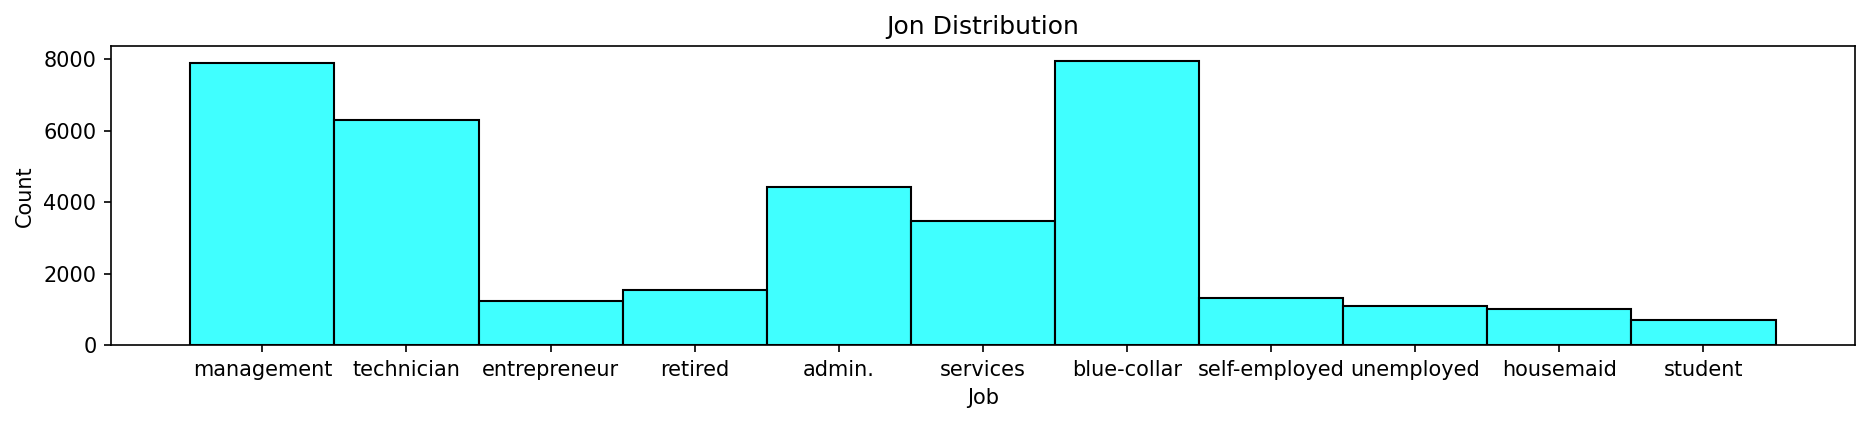

In [49]:
plt.figure(figsize = (15,15),dpi=150)
plt.subplot(5,1,1)
sns.histplot((sample.job),color='Aqua')
plt.title('Jon Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()

#Maritial Distribution

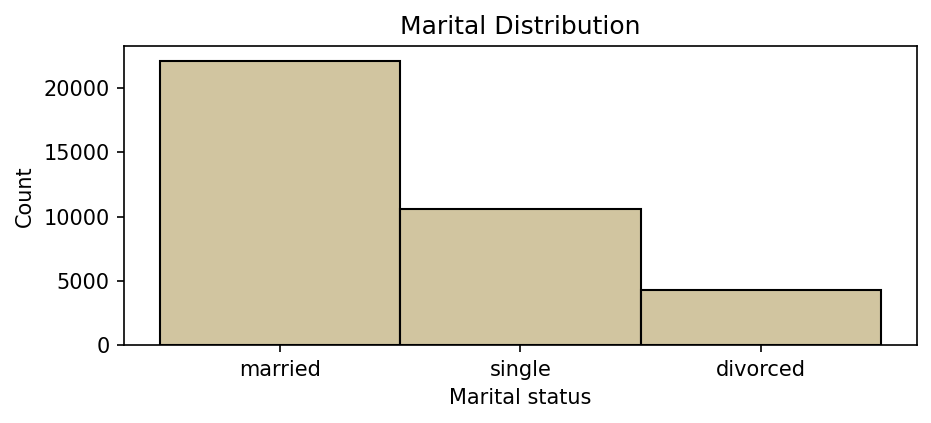

In [50]:
plt.figure(figsize = (15,15),dpi=150)
plt.subplot(5,2,1)
sns.histplot((sample.marital),color='#C2B280')
plt.title('Marital Distribution')
plt.xlabel('Marital status')
plt.ylabel('Count')
plt.show()

#Education Distribution

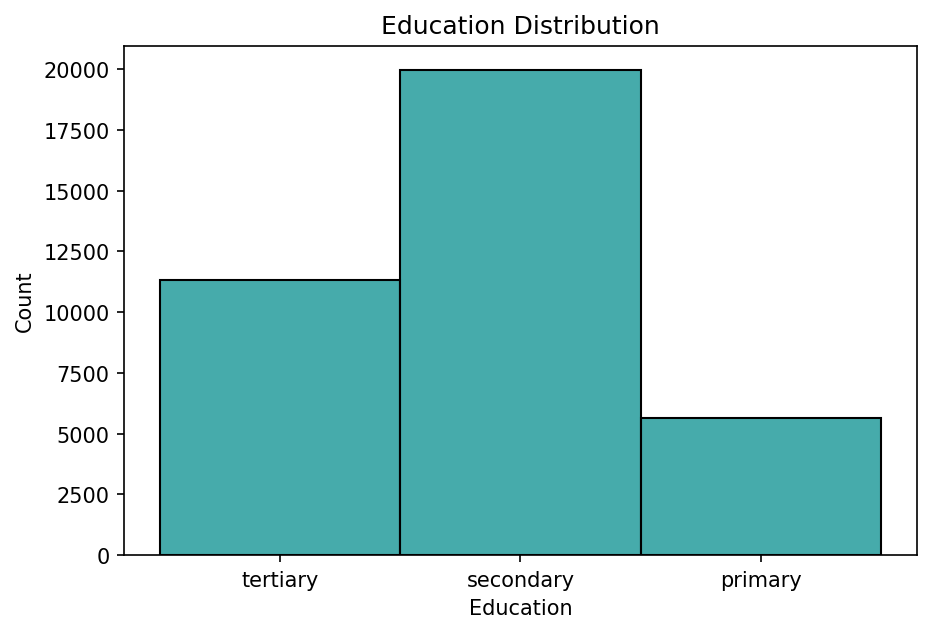

In [51]:
plt.figure(figsize = (15,15),dpi=150)
plt.subplot(3,2,1)
sns.histplot((sample.education_qual),color='#088F8F')
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

#call distribution

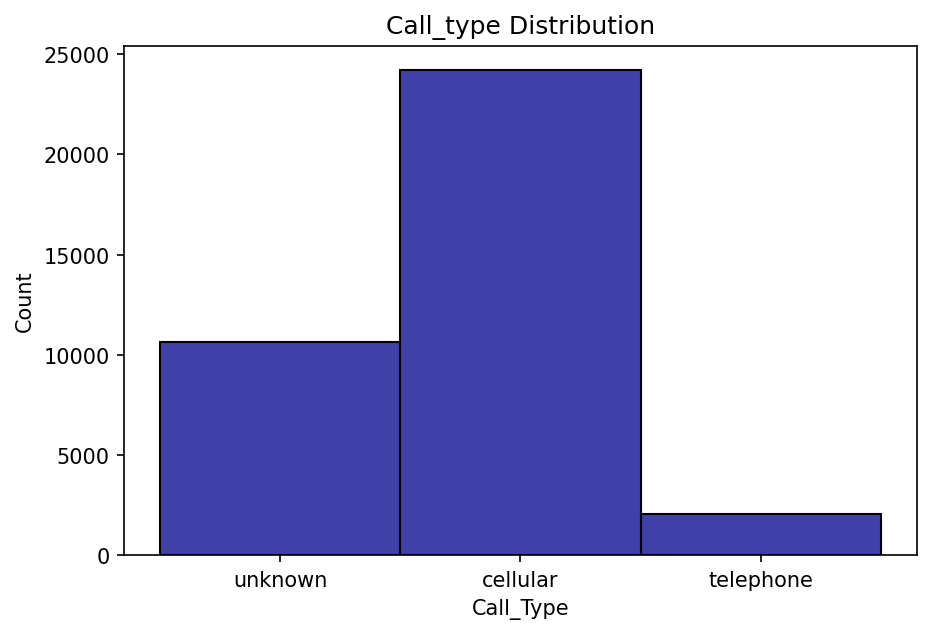

In [52]:
plt.figure(figsize = (15,15),dpi=150)
plt.subplot(3,2,1)
sns.histplot((sample.call_type),color='#00008B')
plt.title('Call_type Distribution')
plt.xlabel('Call_Type')
plt.ylabel('Count')
plt.show()

#Day distribution

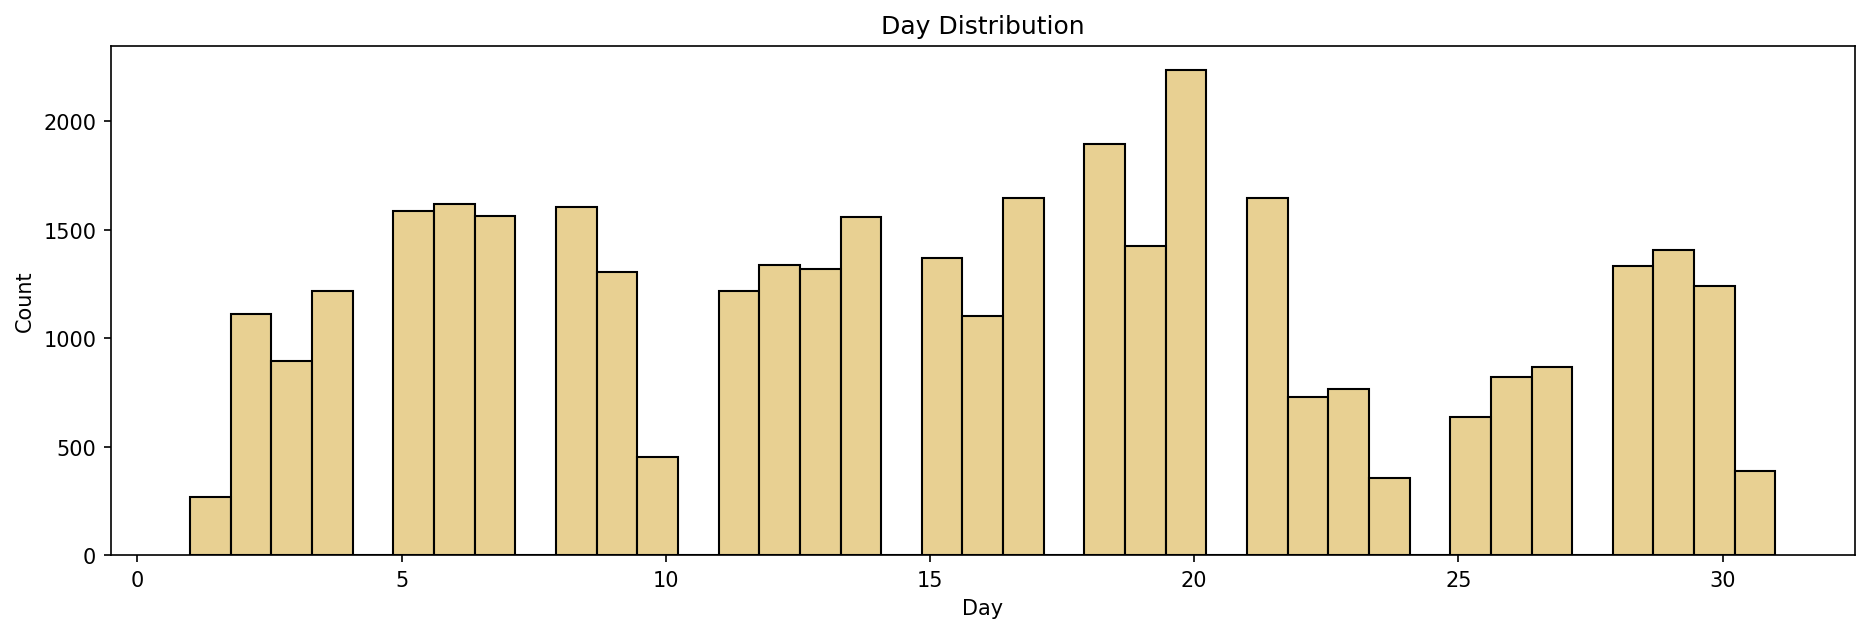

In [53]:
plt.figure(figsize = (15,15),dpi=150)
plt.subplot(3,1,1)
sns.histplot((sample.day),color='#E1C16E')
plt.title('Day Distribution')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

#Month Distribution

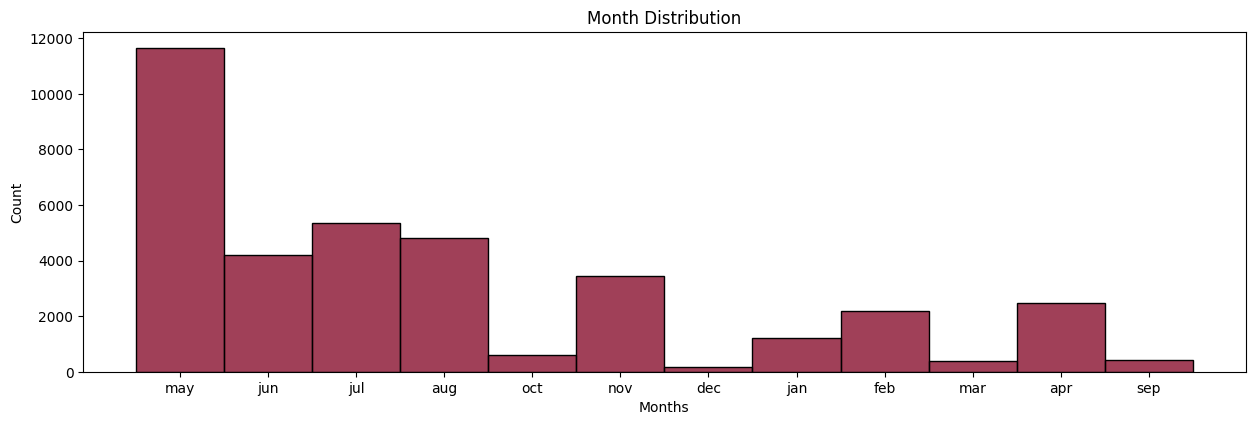

In [54]:
plt.figure(figsize = (15,15),dpi=100)
plt.subplot(3,1,1)
sns.histplot((sample.mon),color='#800020')
plt.title('Month Distribution')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

#Duration distribution

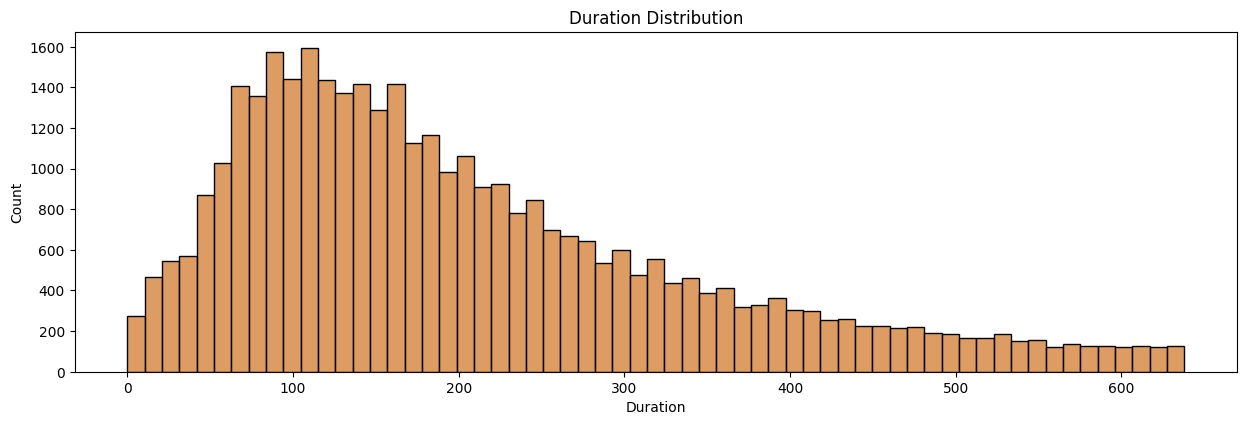

In [55]:
plt.figure(figsize = (15,15),dpi=100)
plt.subplot(3,1,2)
sns.histplot((sample.dur),color='#D27D2D')
plt.title('Duration Distribution')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

#Number Of call Distribution

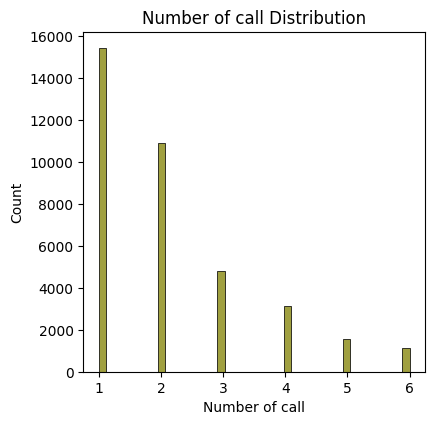

In [56]:
plt.figure(figsize = (15,15),dpi=100)
plt.subplot(3,3,2)
sns.histplot((sample.num_calls),color='#808000')
plt.title('Number of call Distribution')
plt.xlabel('Number of call')
plt.ylabel('Count')
plt.show()

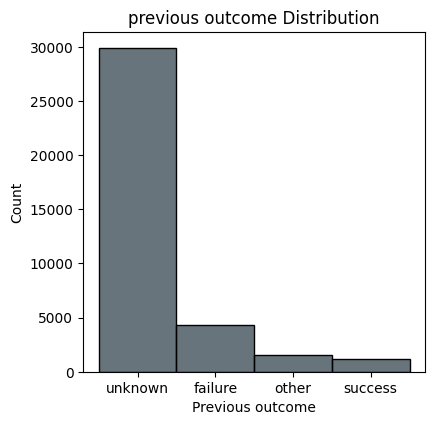

In [57]:
plt.figure(figsize = (15,15),dpi=100)
plt.subplot(3,3,2)
sns.histplot((sample.prev_outcome),color='#36454F')
plt.title('previous outcome Distribution')
plt.xlabel('Previous outcome')
plt.ylabel('Count')
plt.show()

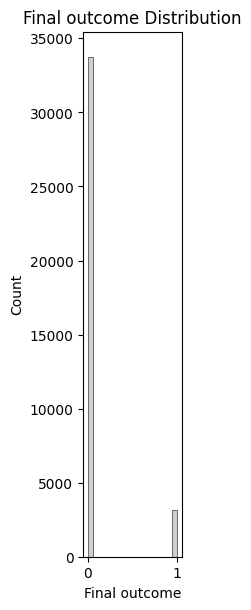

In [58]:
plt.figure(figsize = (15,15),dpi=100)
plt.subplot(2,10,2)
sns.histplot((sample.Outcome),color='#C0C0C0')
plt.title('Final outcome Distribution')
plt.xlabel('Final outcome')
plt.ylabel('Count')
plt.show()

#Feature VS Target

#Job Vs Outcome

Text(0, 0.5, 'Outcome')

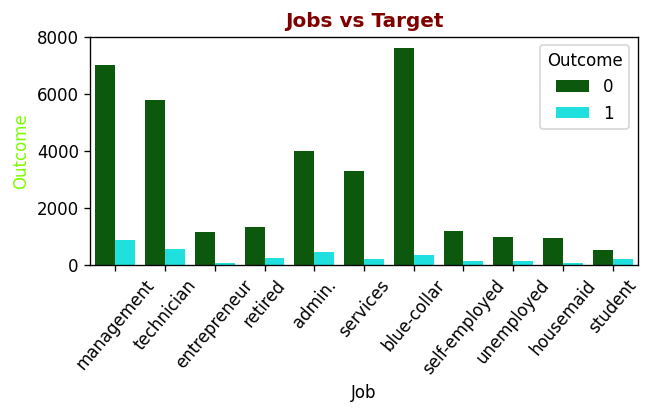

In [59]:
plt.figure(figsize=(20,35), dpi=120)
plt.subplot(12,3,1)
sns.countplot(x='job',hue='Outcome',data=sample, palette=['DarkGreen', 'cyan'])
plt.xticks(rotation=50)
plt.title('Jobs vs Target', fontweight='bold', color='maroon')
plt.xlabel('Job')
plt.ylabel('Outcome', color='#7CFC00')

Text(0, 0.5, 'Outcome')

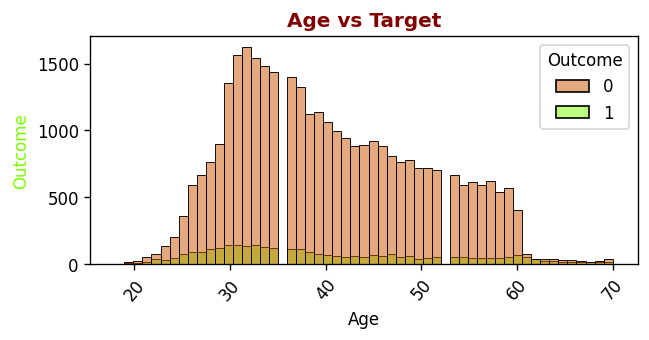

In [60]:
plt.figure(figsize=(20,35), dpi=120)
plt.subplot(12,3,1)
sns.histplot(x='age',hue='Outcome',data=sample, palette=['#CC5500','Chartreuse'])
plt.xticks(rotation=50)
plt.title('Age vs Target', fontweight='bold', color='maroon')
plt.xlabel('Age')
plt.ylabel('Outcome', color='#7CFC00')

#Day vs Outcome

Text(0, 0.5, 'Outcome')

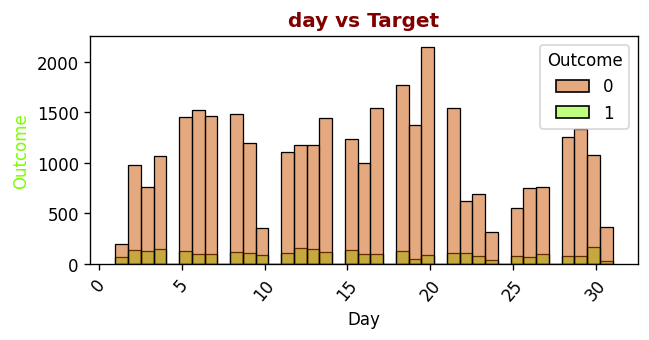

In [61]:
plt.figure(figsize=(20,35), dpi=120)
plt.subplot(12,3,1)
sns.histplot(x='day',hue='Outcome',data=sample, palette=['#CC5500','Chartreuse'])
plt.xticks(rotation=50)
plt.title('day vs Target', fontweight='bold', color='maroon')
plt.xlabel('Day')
plt.ylabel('Outcome', color='#7CFC00')

#Duration vs outcome

Text(0, 0.5, 'Outcome')

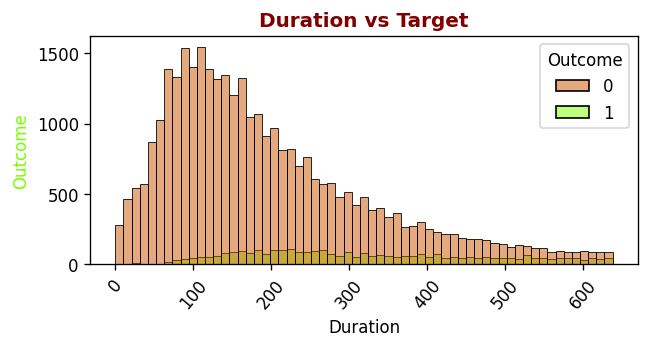

In [62]:
plt.figure(figsize=(20,35), dpi=120)
plt.subplot(12,3,1)
sns.histplot(x='dur',hue='Outcome',data=sample, palette=['#CC5500','Chartreuse'])
plt.xticks(rotation=50)
plt.title('Duration vs Target', fontweight='bold', color='maroon')
plt.xlabel('Duration')
plt.ylabel('Outcome', color='#7CFC00')

#Marital vs Outcome

Text(0, 0.5, 'Outcome')

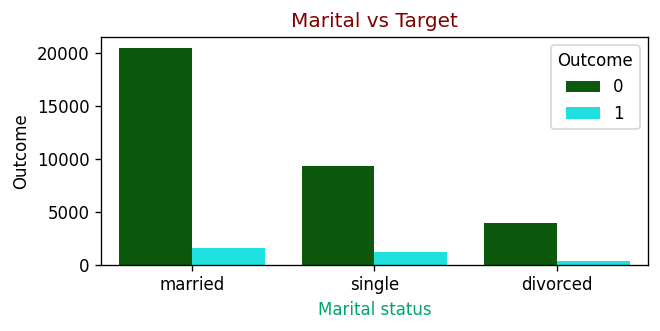

In [63]:
plt.figure(figsize=(20,35), dpi=120)
plt.subplot(12,3,1)
sns.countplot(x='marital',hue='Outcome',data=sample, palette=['DarkGreen','cyan'])
plt.title('Marital vs Target', color='maroon')
plt.xlabel('Marital status',color='#00A36C')
plt.ylabel('Outcome' )

#Educational Qualification vs Outcome

Text(0, 0.5, 'Outcome')

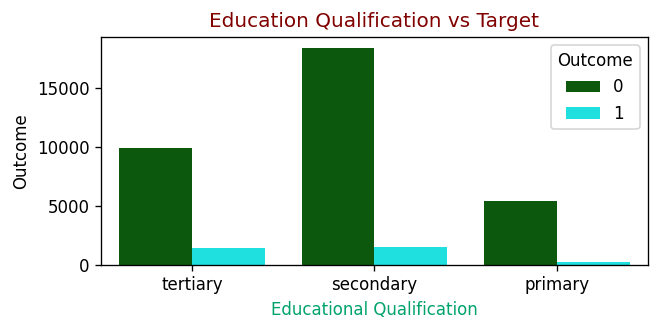

In [64]:
plt.figure(figsize=(20,35), dpi=120)
plt.subplot(12,3,1)
sns.countplot(x='education_qual',hue='Outcome',data=sample, palette=['DarkGreen','cyan'])
plt.title('Education Qualification vs Target', color='maroon')
plt.xlabel('Educational Qualification',color='#00A36C')
plt.ylabel('Outcome' )

#call type Vs Target

Text(0, 0.5, 'Outcome')

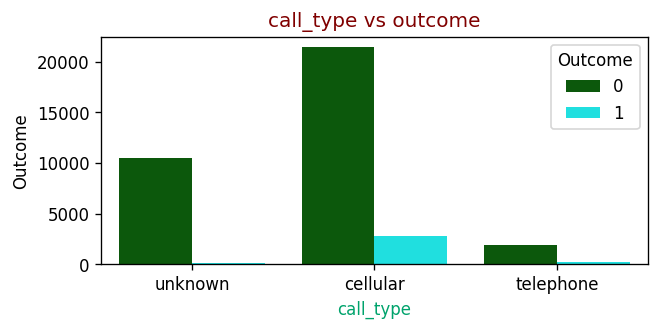

In [65]:
plt.figure(figsize=(20,35), dpi=120)
plt.subplot(12,3,1)
sns.countplot(x='call_type',hue='Outcome',data=sample, palette=['DarkGreen', 'cyan'])
plt.title('call_type vs outcome', color='maroon')
plt.xlabel('call_type',color='#00A36C')
plt.ylabel('Outcome' )

#Month vs outcome

Text(0, 0.5, 'Outcome')

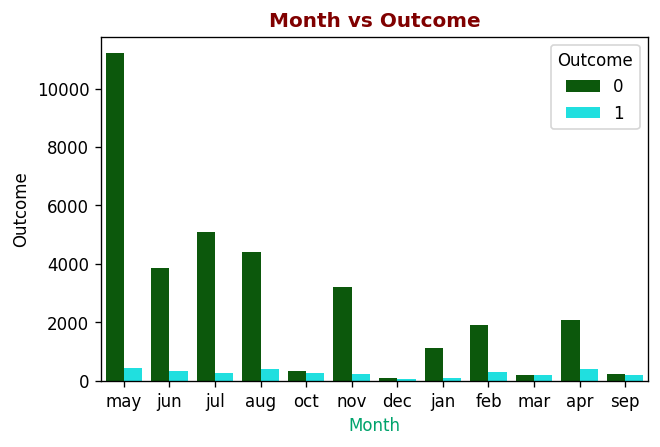

In [66]:
plt.figure(figsize=(20,35), dpi=120)
plt.subplot(8,3,1)
sns.countplot(x='mon',hue='Outcome',data=sample, palette=['DarkGreen', 'cyan'])
plt.title('Month vs Outcome', fontweight='bold', color='maroon')
plt.xlabel('Month',color='#00A36C')
plt.ylabel('Outcome')

Text(0, 0.5, 'Outcome')

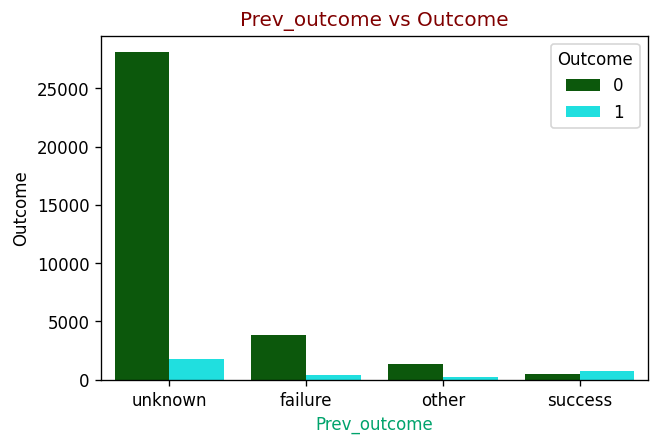

In [67]:
plt.figure(figsize=(20,35), dpi=120)
plt.subplot(8,3,1)
sns.countplot(x='prev_outcome',hue='Outcome',data=sample, palette=['DarkGreen', 'cyan'])
plt.title('Prev_outcome vs Outcome', color='maroon')
plt.xlabel('Prev_outcome',color='#00A36C')
plt.ylabel('Outcome')

#Correalation With Features

In [68]:
#x=sample[['job','marital','education_qual','call_type', 'mon', 'prev_outcome','Outcome']].corr()
#sns.heatmap(x, annot=True, cmap="coolwarm")

#Encoding the categorical features

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
cat_column=['job','marital','education_qual','call_type', 'mon', 'prev_outcome']
unique_dist={}
for i in cat_column:
    unique_dist[f'{i}_initial']=sample[i].unique().tolist()

    le=LabelEncoder()
    sample[i]=le.fit_transform(sample[i])
    unique_dist[f'{i}_Final']=sample[i].unique().tolist()
unique_dist

{'job_initial': ['management',
  'technician',
  'entrepreneur',
  'retired',
  'admin.',
  'services',
  'blue-collar',
  'self-employed',
  'unemployed',
  'housemaid',
  'student'],
 'job_Final': [4, 9, 2, 5, 0, 7, 1, 6, 10, 3, 8],
 'marital_initial': ['married', 'single', 'divorced'],
 'marital_Final': [1, 2, 0],
 'education_qual_initial': ['tertiary', 'secondary', 'primary'],
 'education_qual_Final': [2, 1, 0],
 'call_type_initial': ['unknown', 'cellular', 'telephone'],
 'call_type_Final': [2, 0, 1],
 'mon_initial': ['may',
  'jun',
  'jul',
  'aug',
  'oct',
  'nov',
  'dec',
  'jan',
  'feb',
  'mar',
  'apr',
  'sep'],
 'mon_Final': [8, 6, 5, 1, 10, 9, 2, 4, 3, 7, 0, 11],
 'prev_outcome_initial': ['unknown', 'failure', 'other', 'success'],
 'prev_outcome_Final': [3, 0, 1, 2]}

In [70]:
import json
import pickle
with open('Cat_Columns_Encoded_value.json', 'w') as file:
    json.dump(unique_dist, file , indent = 4)

In [71]:
with open("Cat_Columns_Encoded_value.json",'rb') as file:
    encode_file = json.load(file)

In [72]:
town_encode = encode_file['mon_initial'].index('aug')
town_encode

3

In [73]:
x = sample[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].values
y=sample['Outcome'].values

In [74]:
x

array([[ 58,   4,   1, ..., 261,   1,   3],
       [ 44,   9,   2, ..., 151,   1,   3],
       [ 33,   2,   1, ...,  76,   1,   3],
       ...,
       [ 25,   9,   2, ..., 386,   2,   3],
       [ 57,   1,   1, ..., 508,   4,   3],
       [ 37,   2,   1, ..., 361,   2,   1]])

#spliting the data

In [75]:
# splitting the data as train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 3 )

In [76]:
print(len(x_train))
print(len(y_train))

29552
29552


In [77]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [78]:
#Oversampling balancing Smotten method
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
x_res, y_res = smt.fit_resample(x_train_scaled, y_train)

# Model selection

##Logistic Regression

In [79]:
#Logistic Regresssion
from sklearn.linear_model import LogisticRegression

ln = LogisticRegression()

ln.fit(x_res,y_res)
ln.score(x_test_scaled,y_test)


0.6899025446670276

In [80]:
y_pred=ln.predict_proba(x_test_scaled)
y_pred

array([[0.79184212, 0.20815788],
       [0.19725867, 0.80274133],
       [0.58176761, 0.41823239],
       ...,
       [0.17379696, 0.82620304],
       [0.15694525, 0.84305475],
       [0.27883796, 0.72116204]])

In [81]:
from sklearn.metrics import roc_auc_score
log_reg_auroc = roc_auc_score(y_test,y_pred[:,1])
print("AUROC for logist_regression  :  ",round(log_reg_auroc,2))

AUROC for logist_regression  :   0.81


#KNN classification

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn= KNeighborsClassifier(i)
  knn.fit(x_res, y_res)
  print("K =", i, "Train R2 Score : ", knn.score(x_test_scaled,y_test), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_test_scaled, y_test, cv=10)))


K = 1 Train R2 Score :  0.845425013535463 Cross Value Accuracy : 0.8921213021331837
K = 2 Train R2 Score :  0.8532755820249053 Cross Value Accuracy : 0.9112073739140639
K = 3 Train R2 Score :  0.8239036275040607 Cross Value Accuracy : 0.9083649625400178
K = 4 Train R2 Score :  0.8337845154304278 Cross Value Accuracy : 0.9098545606565672
K = 5 Train R2 Score :  0.8122631293990255 Cross Value Accuracy : 0.9098541939411275
K = 6 Train R2 Score :  0.8198429886302111 Cross Value Accuracy : 0.9114787433395307
K = 7 Train R2 Score :  0.7998105035192203 Cross Value Accuracy : 0.9105315173584753
K = 8 Train R2 Score :  0.8083378451543043 Cross Value Accuracy : 0.9112084740603834
K = 9 Train R2 Score :  0.7930427720628046 Cross Value Accuracy : 0.9097201594478731
K = 10 Train R2 Score :  0.7998105035192203 Cross Value Accuracy : 0.9112082907026634
K = 20 Train R2 Score :  0.7799133730373579 Cross Value Accuracy : 0.9132376939466281
K = 30 Train R2 Score :  0.7707092582566324 Cross Value Accuracy

#K=20 have cross value acc=0.913 with R2 score=78.2

In [83]:
knn= KNeighborsClassifier(i)
knn.fit(x_res, y_res)
y_pred=knn.predict_proba(x_test_scaled)
print("KNN Score: ",knn.score(x_test_scaled,y_test))
print( "AUROC on the dataset : ",roc_auc_score( y_test, y_pred[:, 1]))

KNN Score:  0.7564970221981592
AUROC on the dataset :  0.8467151920690179


#XG boost

In [84]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for le in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = le, n_estimators=100, verbosity = 0) # model
  model.fit(x_res,y_res) # model train
  print("Learning value = ", le," Train R2 score : ", model.score(x_test_scaled,y_test)," Cross-Val score : ", np.mean(cross_val_score(model, x_test_scaled, y_test, cv=10)))



Learning value =  0.01  Train R2 score :  0.7432322685435842  Cross-Val score :  0.9163511080307012
Learning value =  0.02  Train R2 score :  0.7964266377910124  Cross-Val score :  0.921629059998313
Learning value =  0.03  Train R2 score :  0.8276935571196535  Cross-Val score :  0.9237954314590506
Learning value =  0.04  Train R2 score :  0.8455603681645912  Cross-Val score :  0.9242013854509317
Learning value =  0.05  Train R2 score :  0.8570655116404982  Cross-Val score :  0.9237957981744905
Learning value =  0.1  Train R2 score :  0.8837303735787764  Cross-Val score :  0.9244723881609588
Learning value =  0.11  Train R2 score :  0.886978884677856  Cross-Val score :  0.9239320329603838
Learning value =  0.12  Train R2 score :  0.889956686518679  Cross-Val score :  0.9270448969712973
Learning value =  0.13  Train R2 score :  0.8906334596643205  Cross-Val score :  0.9258266682802148
Learning value =  0.14  Train R2 score :  0.8956415809420682  Cross-Val score :  0.9251497115783067
Lear

##Learing value with 0.12 which gives good cross validation Score 0.927 with accuracy of 88.9%

#Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score


In [86]:
dc=DecisionTreeClassifier(max_depth=2)
dc.fit(x_res,y_res)
y_pred=dc.predict_proba(x_test_scaled)
print("Decision tree R2 Score=",dc.score(x_test_scaled,y_test))
print("AUROC of dataset=",roc_auc_score(y_test,y_pred[:,1]))


Decision tree R2 Score= 0.632241472658365
AUROC of dataset= 0.731049149739294


In [87]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np

for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,15,20]:
  dc=DecisionTreeClassifier(max_depth=i)
  dc.fit(x_res,y_res)#model train
  y_pred=dc.predict(x_test_scaled)
  Accuracy=dc.score(x_test_scaled,y_test) #model accuracy
  CVS=cross_val_score(dc,x_test_scaled,y_test,cv=10)# cross validation accuracy
  print("depth=",i,"R2_score=",Accuracy,"cross_val_acc=",np.mean(CVS))

depth= 1 R2_score= 0.46358960476448297 cross_val_acc= 0.9124257859628664
depth= 2 R2_score= 0.632241472658365 cross_val_acc= 0.9137789659358028
depth= 3 R2_score= 0.6196534921494316 cross_val_acc= 0.9219002460660601
depth= 4 R2_score= 0.6306172171088251 cross_val_acc= 0.9223062000579411
depth= 5 R2_score= 0.7365998917162967 cross_val_acc= 0.9204106479495107
depth= 6 R2_score= 0.7133188955062263 cross_val_acc= 0.9185150958410802
depth= 7 R2_score= 0.7539252842447212 cross_val_acc= 0.915675251475113
depth= 8 R2_score= 0.7596101786681104 cross_val_acc= 0.9156739679710734
depth= 9 R2_score= 0.7878992961559286 cross_val_acc= 0.9121540498219595
depth= 10 R2_score= 0.8245804006497022 cross_val_acc= 0.9109371046349164
depth= 11 R2_score= 0.834731997834326 cross_val_acc= 0.9066049117866009
depth= 12 R2_score= 0.839469409853817 cross_val_acc= 0.9052509983827848
depth= 13 R2_score= 0.847996751488901 cross_val_acc= 0.8998373617024397
depth= 15 R2_score= 0.8635625338386573 cross_val_acc= 0.89536838

## Depth=4 have good Cross_val_score is 0.9221 with accuracy of 63.2%

##Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")  #max_depth=log(no of features)
rfc.fit(x_train, y_train)
y_pred= rfc.predict_proba(x_test)
print("Random Forest R2 Score=",rfc.score(x_test, y_test))
print("AUROC of dataset=",roc_auc_score(y_test,y_pred[:,1]))


Random Forest R2 Score= 0.9124255549539795
AUROC of dataset= 0.8473489296049205


In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
for i in [1,2,8,9,10,20,22,25]:
  rfc=RandomForestClassifier(max_depth=i,n_estimators=100,max_features="sqrt")
  rfc.fit(x_train,y_train)
  y_pred=rfc.predict_proba(x_test)
  acc=rfc.score(x_test,y_test)
  val_acc=cross_val_score(rfc,x_test,y_test,cv=10)
  print('Depth=',i,'R2_score=',acc,'cross_val_acc=',np.mean(val_acc))


Depth= 1 R2_score= 0.9124255549539795 cross_val_acc= 0.9124257859628664
Depth= 2 R2_score= 0.9124255549539795 cross_val_acc= 0.9124257859628664
Depth= 8 R2_score= 0.926367081754196 cross_val_acc= 0.9220361141365135
Depth= 9 R2_score= 0.9256903086085544 cross_val_acc= 0.9228476554048356
Depth= 10 R2_score= 0.9269085002707093 cross_val_acc= 0.9244727548763987
Depth= 20 R2_score= 0.9260963724959393 cross_val_acc= 0.9220362974942334
Depth= 22 R2_score= 0.9252842447211694 cross_val_acc= 0.9212243895104717
Depth= 25 R2_score= 0.9254195993502978 cross_val_acc= 0.923931849602664


## Depth =8 give good cross_val_Score of 0.923 with accuracy of 92.2%

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=8,n_estimators=100,max_features="sqrt")  #max_depth=log(no of features)
rf.fit(x_train, y_train)
y_pred= rf.predict_proba(x_test)
print("Random Forest R2 Score=",rf.score(x_test, y_test))
print("AUROC of dataset=",roc_auc_score(y_test,y_pred[:,1]))


Random Forest R2 Score= 0.923795343800758
AUROC of dataset= 0.9008944778853344


#Extra tree classifier

In [91]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_estimators=100,max_depth=3,max_features="sqrt")
etc.fit(x_res,y_res)
y_pred=etc.predict_proba(x_test)
print("Extra Tree R2 score=",etc.score(x_res,y_res))
print("AUROC of dataset=",roc_auc_score(y_test,y_pred[:,1]))

Extra Tree R2 score= 0.7946041103741914
AUROC of dataset= 0.6609239361337471


In [92]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,15,20]:
  etc=ExtraTreesClassifier(n_estimators=100,max_depth=i,max_features="sqrt")
  etc.fit(x_res,y_res)#model train
  y_pred=etc.predict(x_test)
  Accuracy=etc.score(x_test_scaled,y_test) #model accuracy
  CVS=cross_val_score(etc,x_test_scaled,y_test,cv=10)# cross validation accuracy
  print("depth=",i," Extra Tree R2_score=",Accuracy,"cross_val_acc=",np.mean(CVS))

depth= 1  Extra Tree R2_score= 0.43069842988630214 cross_val_acc= 0.9124257859628664
depth= 2  Extra Tree R2_score= 0.5307255008121278 cross_val_acc= 0.9124257859628664
depth= 3  Extra Tree R2_score= 0.5837845154304278 cross_val_acc= 0.9124257859628664
depth= 4  Extra Tree R2_score= 0.6096372495939361 cross_val_acc= 0.9124257859628664
depth= 5  Extra Tree R2_score= 0.6448294531672983 cross_val_acc= 0.9124257859628664
depth= 6  Extra Tree R2_score= 0.6643205197617759 cross_val_acc= 0.9124257859628664
depth= 7  Extra Tree R2_score= 0.6996480779642664 cross_val_acc= 0.9128317399547472
depth= 8  Extra Tree R2_score= 0.7139956686518679 cross_val_acc= 0.9140497852881099
depth= 9  Extra Tree R2_score= 0.7253654574986464 cross_val_acc= 0.9152680139791926
depth= 10  Extra Tree R2_score= 0.7424201407688142 cross_val_acc= 0.9160799219629544
depth= 11  Extra Tree R2_score= 0.7566323768272875 cross_val_acc= 0.917840339431811
depth= 12  Extra Tree R2_score= 0.7650243638332431 cross_val_acc= 0.919194

##Depth=15 give the good cross_val_score=0.920 with accuracy of model=81.3%

##Overview of models

Model are trained and below follwoing data Acuuracy & Cross validation score are

*   Logitic Regression-Accuracy=69.1% AUROC=0.81
*   KNN-Accuracy=78.2% with CVS=0.913
*   XG Boost- Accuracy=88.9% with CVS=0.927
*   Decision Tree- Accuracy=63.2% with CVS=0.922
*  Random Forest- Accuracy=92.2% with CVS=0.923
*  Extra tree- Accuracy=81.3% with CVS=0.920


Finallt Random forest Classifier give best accuracy 0f 92.2% with cross validation score of 0.923 will be our final model.




##pickeling

In [93]:
with open ('prediction.pkl', 'wb') as f:
    pickle.dump(rf , f)

##Feature Importance

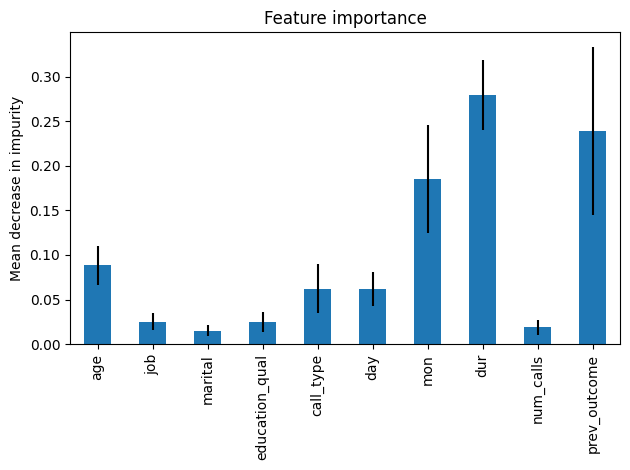

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

importances = rf.feature_importances_
indies =np.argsort(importances)
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
features=['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']
forest_importance=pd.Series(importances,index=features)
fig,ax=plt.subplots()
forest_importance.plot.bar(yerr=std,ax=ax)
ax.set_title("Feature importance")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()


As per above plot Duration is Importance feature

##Clustering Model(Unsupervised Learning)

In [95]:
x_train

array([[ 42,  10,   0, ...,  97,   1,   0],
       [ 31,   9,   1, ..., 210,   1,   3],
       [ 60,   5,   0, ..., 241,   3,   3],
       ...,
       [ 50,   7,   0, ..., 170,   2,   3],
       [ 29,   8,   2, ...,  25,   6,   3],
       [ 43,   9,   1, ..., 162,   5,   3]])

## K mean algorithm

In [96]:
#x = sample[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].to_numpy()
#y=sample['Outcome']

In [97]:
# splitting the data as train and test

f#rom sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 3 )

<_io.BufferedWriter name='prediction.pkl'>

In [102]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=12)
kmeans.fit(x_res)
y_kmeans=kmeans.predict(x_res)
(y_kmeans)

array([1, 0, 1, ..., 0, 0, 1], dtype=int32)

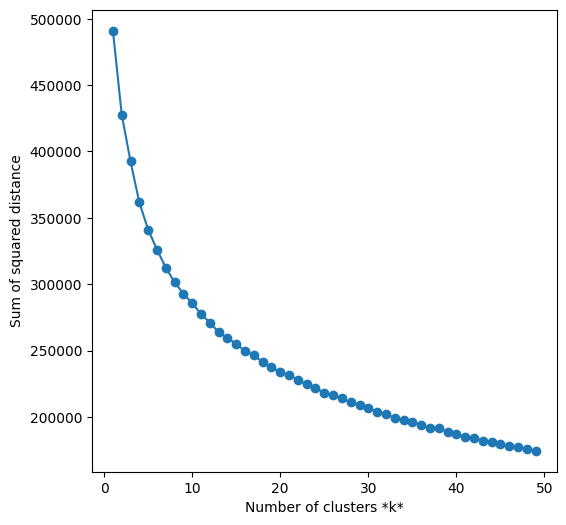

In [105]:
sse = []
list_k = list(range(1,50))


for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(x_res)
    sse.append(km.inertia_)


# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

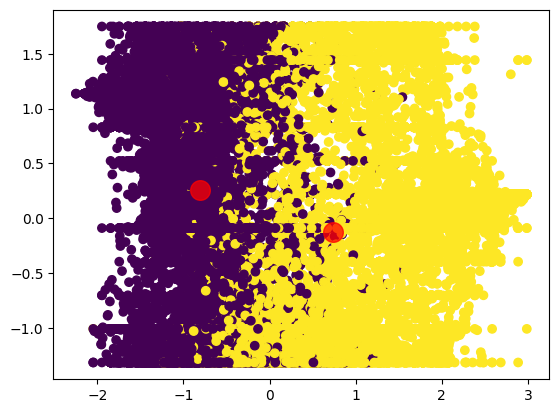

In [103]:
plt.scatter(x_res[:, 0],x_res[:, 1],c=y_kmeans,cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.show()